In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_style("white")

In [22]:
data = pd.read_csv('../../results/cregmcs/results_ethanol.txt', header=None)
data = data[0].apply(lambda x: x.strip().split('\t'))
sizes = data.apply(len)

In [68]:
cut_size = range(2,4)
n_kos = [len([x for y in data for x in y if len(y) == i and '=' not in x]) for i in cut_size]
n_up = [len([x for y in data for x in y if len(y) == i and '>=' in x]) for i in cut_size]
n_down = [len([x for y in data for x in y if len(y) == i and '<=' in x]) for i in cut_size]
n_kos = np.array(n_kos)
n_up = np.array(n_up)
n_down = np.array(n_down)

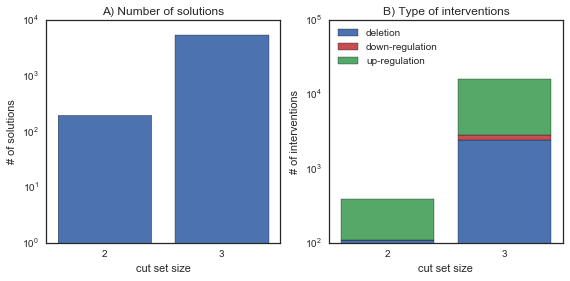

In [96]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.hist(sizes, log=True, bins=np.arange(1.5, 4.5), rwidth=0.8, align='mid')
plt.xticks([2, 3])
plt.ylim((1e0, 1e4))
plt.xlabel('cut set size')
plt.ylabel('# of solutions')
plt.title('A) Number of solutions')

plt.subplot(1,2,2)
colors = sns.color_palette()
plt.bar(cut_size, n_kos, log=True, color=colors[0], align='center')
plt.bar(cut_size, n_down, bottom=n_kos, log=True, color=colors[2], align='center')
plt.bar(cut_size, n_up, bottom=n_kos+n_down, log=True, color=colors[1], align='center')
plt.xticks([2, 3])
plt.legend(['deletion', 'down-regulation', 'up-regulation'], loc='upper left')
plt.xlabel('cut set size')
plt.ylabel('# of interventions')
plt.title('B) Type of interventions')

plt.tight_layout()
plt.savefig('../../results/cregmcs/cregmcs.png', dpi=150)
